In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-files-Download/refs/heads/master/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

,0
label,0
message,0
length,0
punct,0


In [5]:
df.shape

(5572, 4)

In [6]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


Dataset Balancing

In [7]:
ham = df[df['label']=='ham']
ham.shape

(4825, 4)

In [8]:
spam = df[df['label']=='spam']
spam.shape

(747, 4)

In [9]:
ham = ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [10]:
data = pd.concat([ham, spam], axis=0, ignore_index=True)
data.shape

(1494, 4)

In [12]:
data.sample(5)

,label,message,length,punct
67,ham,Ok darlin i supose it was ok i just worry too ...,148,3
674,ham,I enjoy watching and playing football and bask...,81,3
1305,spam,In The Simpsons Movie released in July 2007 na...,146,10
1378,spam,"Hi babe its Chloe, how r u? I was smashed on s...",160,8
537,ham,You need to get up. Now.,24,2


Exploratory Data Analysis

In [ ]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')

In [13]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

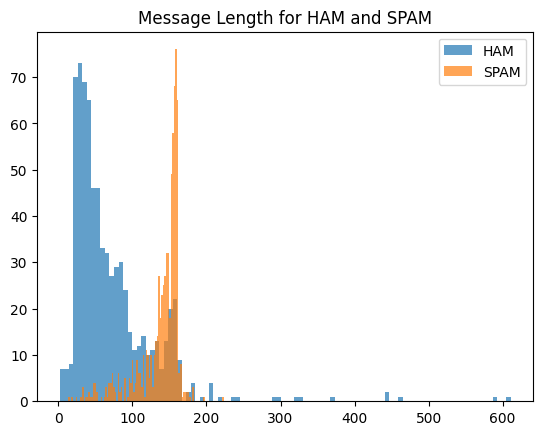

In [ ]:
plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')
plt.title('Message length for HAM and SPAM')
plt.legend()
plt.show()

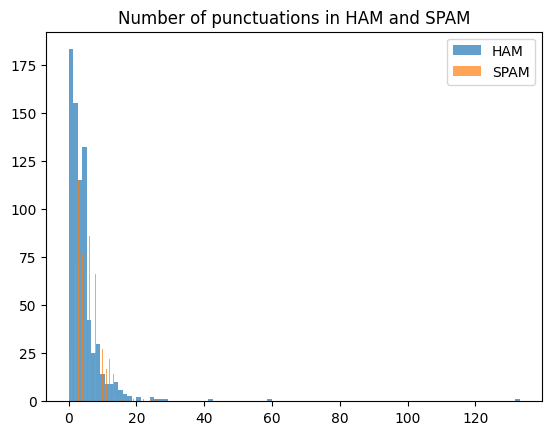

In [20]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')
plt.title('Number of punctuations in HAM and SPAM')
plt.legend()
plt.show()

Data Preparation for Training

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label'],
    test_size=0.2, random_state=0, shuffle=True, stratify=data['label']
)

X_train.shape, X_test.shape


((1195,), (299,))

In [26]:
clf = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Correct step format
    ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))  # Correct step format
])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [27]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.96       150
        spam       1.00      0.91      0.95       149

    accuracy                           0.95       299
   macro avg       0.96      0.95      0.95       299
weighted avg       0.96      0.95      0.95       299



In [28]:
clf.predict(['Hi, How are you?'])

array(['ham'], dtype=object)

In [29]:
clf.predict(['Free entry in 2 a wkly comp to win FA Cup final'])

array(['spam'], dtype=object)

In [31]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb')) # write in binary mode

In [33]:
model = pickle.load(open('model.pkl', 'rb')) # read in binary mode
model.predict(['Free entry in 2 a wkly comp to win FA Cup final'])

array(['spam'], dtype=object)